## 2.1 Image Formation Model

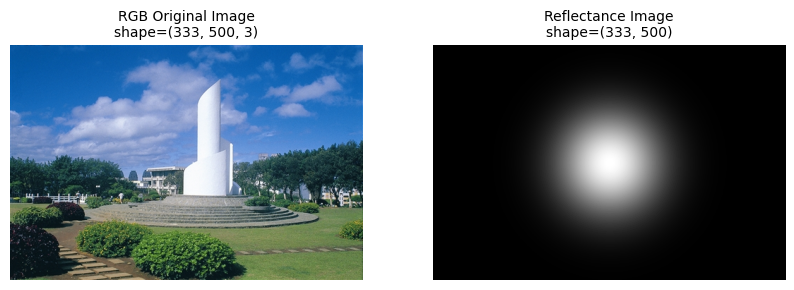

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
    for x in range( nr ):
        for y in range( nc ):
            reflectance[x,y] = np.floor(255*np.exp( -( (x-x0)**2 + (y-y0)**2 ) / (2*sigma*sigma) ))
    for x in range( nr ):
        for y in range( nc ):
            for k in range( 3 ):
                val = round( reflectance[x,y] * f[x,y,k]/255)
                g[x,y,k] = np.uint8( val )
    return reflectance


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2
sigma = 50
img2 = image_formation_model( img, x0, y0, sigma )
    
#plt.figure(figsize=(12, 10))
#plt.subplot(1,2,1)   
#plt.title('original image') 
#plt.imshow(img,cmap=plt.cm.jet)
#plt.subplot(1,2,2)   
#plt.title('Reflectance image') 
#plt.imshow(img2,cmap=plt.cm.gray)

display_fig_names = [
    "RGB Original Image\nshape={}".format(img.shape),
    "Reflectance Image\nshape={}".format(img2.shape),
]
display_img = [img, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])
#plt.tight_layout() # margin adjusted


## <font color="Red"> 2.2 Practice: Modify above python program to acquire the image formation result </font>
<img src="IP02_1.png" width="800px">

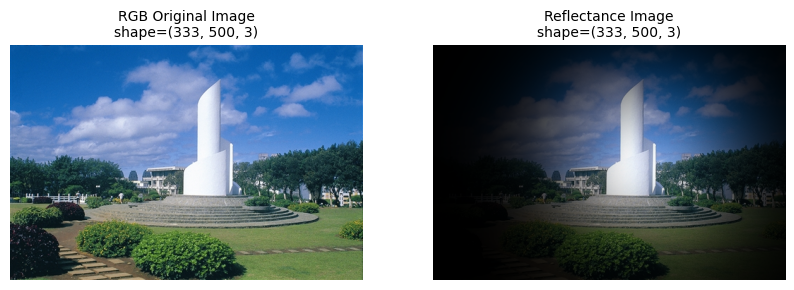

In [125]:
# Practice

import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_formation_model( f, x0, y0, sigma ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
#-------------- Code Here ------------------#    
    # Calculate reflectance using Gaussian distribution
    for x in range(nr):
        for y in range(nc):
            reflectance[x, y] = np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma * sigma))
    
    # Apply reflectance to the image
    for x in range(nr):
        for y in range(nc):
            for k in range(3):  # Loop over RGB channels
                val = reflectance[x, y] * f[x, y, k]
                g[x, y, k] = np.uint8(np.clip(val, 0, 255))  # Clip to ensure within [0, 255]
                
#-------------- Stop Here ------------------#                
    return g


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigma = 100
img2 = image_formation_model( img, x0, y0, sigma )

display_fig_names = [
    "RGB Original Image\nshape={}".format(img.shape),
    "Reflectance Image\nshape={}".format(img2.shape),
]
display_img = [img, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])
    

## <font color="Red"> 2.3 Practice: Modify above python program to acquire the image formation result with different x and y sigma values </font>
<img src="https://www.physicsforums.com/attachments/screen-shot-2017-03-09-at-9-42-13-pm-png.114284/">

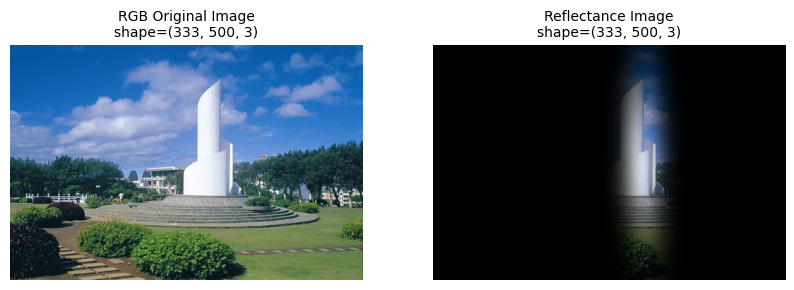

In [127]:
# Practice

import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_formation_model( f, x0, y0, sigmax, sigmay ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    reflectance = np.zeros( [ nr, nc ], dtype = 'float32' )
#-------------- Code Here ------------------#    
 # Calculate reflectance using different sigma for x and y
    for x in range(nr):
        for y in range(nc):
            reflectance[x, y] = np.exp(-((x - x0)**2 / (2 * sigmax**2) + (y - y0)**2 / (2 * sigmay**2)))
    
    # Apply reflectance to the image
    for x in range(nr):
        for y in range(nc):
            for k in range(3):  # Loop over RGB channels
                val = reflectance[x, y] * f[x, y, k]
                g[x, y, k] = np.uint8(np.clip(val, 0, 255))  # Clip to ensure within [0, 255]
#-------------- Stop Here ------------------#                
    return g


imgBGR = cv2.imread("Commons.jpeg", cv2.IMREAD_COLOR)
img = imgBGR[:,:,::-1]
nr, nc = img.shape[:2]
x0 = nr/2
y0 = nc/2+50
sigmax = 100
sigmay = 20
img2 = image_formation_model( img, x0, y0, sigmax, sigmay )

display_fig_names = [
    "RGB Original Image\nshape={}".format(img.shape),
    "Reflectance Image\nshape={}".format(img2.shape),
]
display_img = [img, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])
    

## 2.4 Image Downsampling
#### <font color="orange"> Please check the program to find how the downsampling performed. </font>

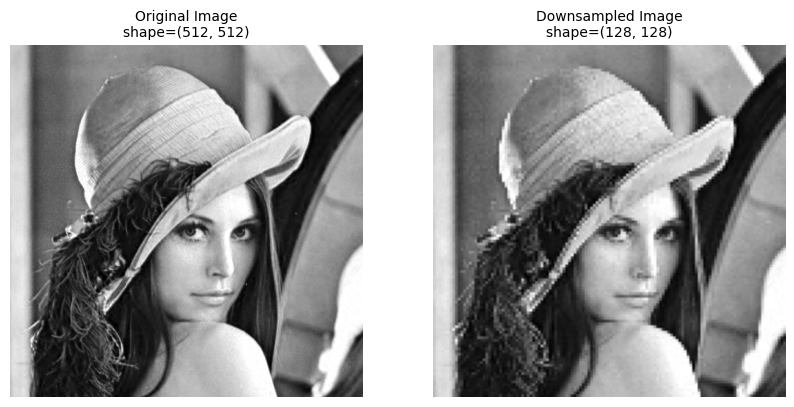

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_downsampling( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
    g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
    for x in range( nr_s ):
        for y in range( nc_s ):
            g[x,y] = f[x * sampling_rate, y * sampling_rate]
    return g

def main():
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_downsampling( img1, 4 )
    
    
    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Downsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main()

## <font color="Red"> 2.5 Image downsampleing by the average of each nxn image block </font>
<font color="Red"> n : sampling_rate   <p>
(1) use for loop to calculate block average   <p>
(2) use np.mean to calculate block average

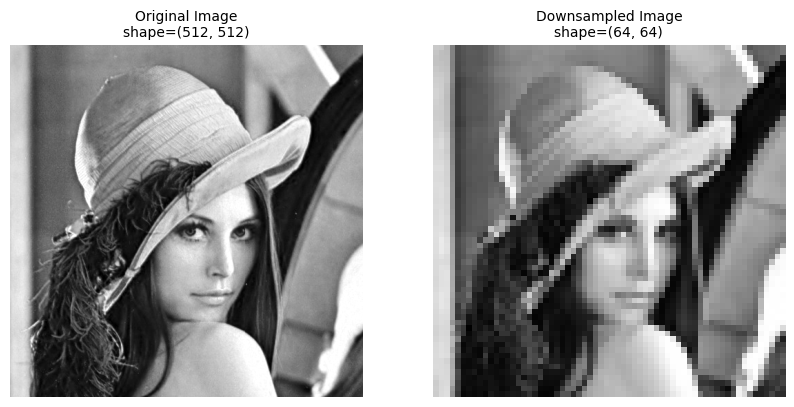

In [129]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_downsampling2( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr // sampling_rate, nc // sampling_rate
    g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
#-------------- Code Here ------------------#      
    # Method (2): Using np.mean to calculate block average
    for i in range(nr_s):
        for j in range(nc_s):
            # Extract the nxn block and compute mean directly using np.mean
            block = f[i * sampling_rate:(i + 1) * sampling_rate, j * sampling_rate:(j + 1) * sampling_rate]
            g[i, j] = np.mean(block, axis=(0, 1))


#-------------- Stop Here ------------------#             
    return g

def main():
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_downsampling2( img1, 8 )
    
    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Downsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main()

## <font color="Red"> 2.6 Image Upsampling
<font color="Red"> integer extension like slide p.27

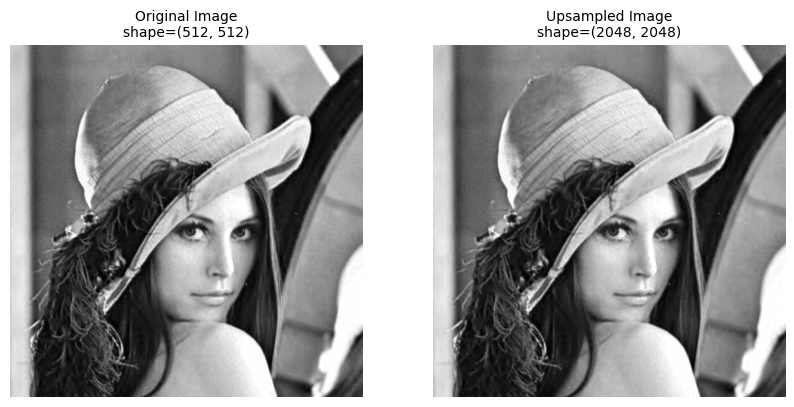

In [131]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_upsampling( f, sampling_rate ):
    nr, nc = f.shape[:2]
    nr_s, nc_s = nr * sampling_rate, nc * sampling_rate
    g = np.zeros( [ nr_s, nc_s ], dtype = 'uint8' )
#-------------- Code Here ------------------#         
# Upsample the image by repeating pixels
    for i in range(nr):
        for j in range(nc):
            g[i*sampling_rate:(i+1)*sampling_rate, j*sampling_rate:(j+1)*sampling_rate] = f[i, j]

#-------------- Stop Here ------------------#              
    return g

def main():
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_upsampling( img1,4 )
    
    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Upsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main()

## 2.7 Image Quantization
#### <font color="Orange"> Please check the program to find how the quantization performed. </font>

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  36.  36.  36.  36.  36.  36.  36.  36.  36.  36.
  36.  36.  36.  36.  36.  36.  36.  36.  36.  36.  36.  36.  36.  36.
  36.  36.  36.  36.  36.  36.  36.  36.  73.  73.  73.  73.  73.  73.
  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.
  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.  73.  73. 109. 109.
 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109.
 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109. 109.
 109. 109. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146.
 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146. 146.
 146. 146. 146. 146. 146. 146. 182. 182. 182. 182. 182. 182. 182. 182.
 182. 182. 182. 182. 182. 182. 182. 182. 182. 182. 182. 182. 182. 182.
 182. 182. 182. 182. 182. 182. 182. 182. 182. 182. 219. 219. 219. 219.
 219. 

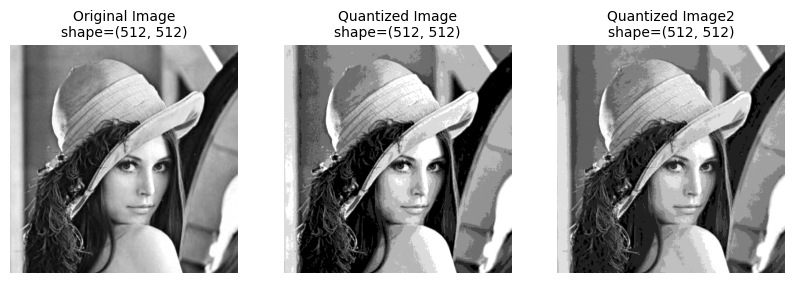

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_quantization( f, bits ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    levels = 2 ** bits
    interval = 256 / levels
    gray_level_interval = 255 / ( levels - 1 )
    table = np.zeros( 256 )
    for k in range( 256 ):
        for l in range( levels ):
            if k >= l * interval and l < ( l + 1 ) * interval:
                table[k] = round( l * gray_level_interval ) 
    print(table)
    for x in range( nr ):
        for y in range( nc ):
            g[x,y] = np.uint8( table[f[x,y]] )
    return g

def image_quantization2( f, bits ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    levels = 2 ** bits
    interval = 256 / levels
    gray_level_interval = 255 / ( levels - 1 )
    table = np.zeros( 256 )
    for k in range( 256 ):
        table[k] = np.round(k/interval)*interval
        if table[k] == 256:
            table[k] = 255
    print(table)
    for x in range( nr ):
        for y in range( nc ):
            g[x,y] = np.uint8( table[f[x,y]] )
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_quantization( img1, 3 )
    img3 = image_quantization2( img1, 3 )    
    
    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Quantized Image\nshape={}".format(img2.shape),
    "Quantized Image2\nshape={}".format(img3.shape),
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])
    
main( )

## <font color="Red"> 2.8 Image Quantization version 2 </font>
###  <font color="Red">Please modify above image quantization program by not using 0 and 255 in table </font>

Mapping Table:
 [ 14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.
  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.  14.
  14.  14.  14.  14.  46.  46.  46.  46.  46.  46.  46.  46.  46.  46.
  46.  46.  46.  46.  46.  46.  46.  46.  46.  46.  46.  46.  46.  46.
  46.  46.  46.  46.  46.  46.  46.  46.  78.  78.  78.  78.  78.  78.
  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.
  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.  78.  78. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141.
 141. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141. 141.
 141. 141. 141. 141. 141. 141. 173. 173. 173. 173. 173. 173. 173. 173.
 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 173.
 173. 173. 173. 173. 173. 173. 173. 173. 173. 173. 205. 205. 

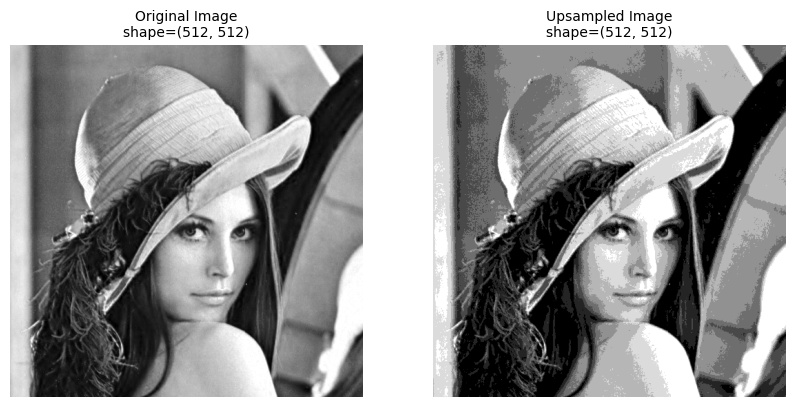

In [123]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_quantization( f, bits ):
    g = f.copy( )
    nr, nc = f.shape[:2]
#-------------- Code Here ------------------#      
    levels = 2 ** bits  # 計算量化級別
    table = np.zeros(256)  # 初始化映射表

    # 根據比特數填充映射表
    interval = (237 - 14) / (levels - 1)  # 確保色階從14到237之間均勻分布
    for l in range(levels):
        # 計算對應的灰度值
        gray_value = round(14 + l * interval)
        # 設定對應範圍的灰度值
        table[l * (256 // levels):(l + 1) * (256 // levels)] = gray_value

    print("Mapping Table:\n", table)  # 輸出映射表

    # 更新量化後的影像
    for x in range(nr):
        for y in range(nc):
            g[x, y] = np.uint8(table[f[x, y]])
#-------------- Stop Here ------------------#              
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_quantization( img1, 3 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Upsampled Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, 2, i+1)
        plot_image(display_img[i], title=display_fig_names[i])
    
main( )

##  <font color="Red"> 2.9 Image Addition & Subtraction(gray) </font>

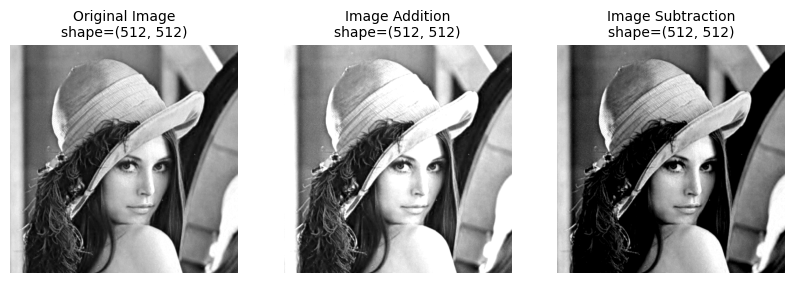

In [133]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_addition( f , c, sign): 
    #sign=0: addition, sign=1: subtraction)
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc ], dtype = 'uint8' )
#-------------- Code Here ------------------#     
    for x in range(nr):
        for y in range(nc):
            if sign == 0:  # Addition
                g[x, y] = np.clip(f[x, y] + c, 0, 255)  # 確保值在 0-255 範圍內
            elif sign == 1:  # Subtraction
                g[x, y] = np.clip(f[x, y] - c, 0, 255)  # 確保值在 0-255 範圍內

#-------------- Stop Here ------------------#             
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_addition( img1 , 50, 0)
    img3 = image_addition( img1 , 50, 1) 

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Image Addition\nshape={}".format(img2.shape),
    "Image Subtraction\nshape={}".format(img3.shape),       
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])
           
main( )

##  <font color="Red"> 2.10 Practice Complements(gray) </font>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc ], dtype = 'uint8' )
#-------------- Code Here ------------------#     
    for i in range(nr):
        for j in range(nc):
            g[i,j] = 255 - f[i,j]

#-------------- Stop Here ------------------#             
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ], dtype = 'uint8' )
#-------------- Code Here ------------------#     
    for i in range(nr):
        for j in range(nc):
           if f[i,j] > g[i,j]:
               u[i,j] = f[i,j]
           else:
               u[i,j] = g[i,j]

#-------------- Stop Here ------------------#                 
    return u

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = image_complement( img1 )
    img3 = image_union( img1, img2 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Complement Image\nshape={}".format(img2.shape),
    "Union Image\nshape={}".format(img3.shape),       
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])
           
main( )

## <font color="Red"> 2.11 Practice Complements(color) </font>

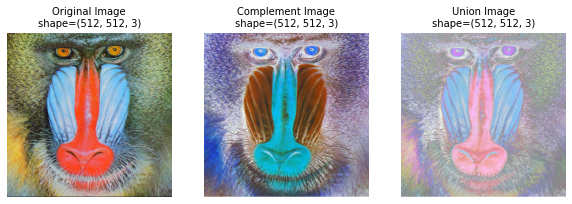

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
def image_complement( f ):
    nr, nc = f.shape[:2]
    g = np.zeros( [ nr, nc , 3], dtype = 'uint8' )
#-------------- Code Here ------------------#     


#-------------- Stop Here ------------------#                 
    return g

def image_union( f, g ):
    nr, nc = f.shape[:2]
    u = np.zeros( [ nr, nc ,3], dtype = 'uint8' )
#-------------- Code Here ------------------#     


#-------------- Stop Here ------------------#                     
    return u

def main( ):
    imgBGR = cv2.imread( "Baboon.bmp", cv2.IMREAD_COLOR )
    img1 = imgBGR[:,:,::-1]    
    img2 = image_complement( img1 )
    img3 = image_union( img1, img2 )
    
    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Complement Image\nshape={}".format(img2.shape),
    "Union Image\nshape={}".format(img3.shape),       
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## 2.12 Image Scaling

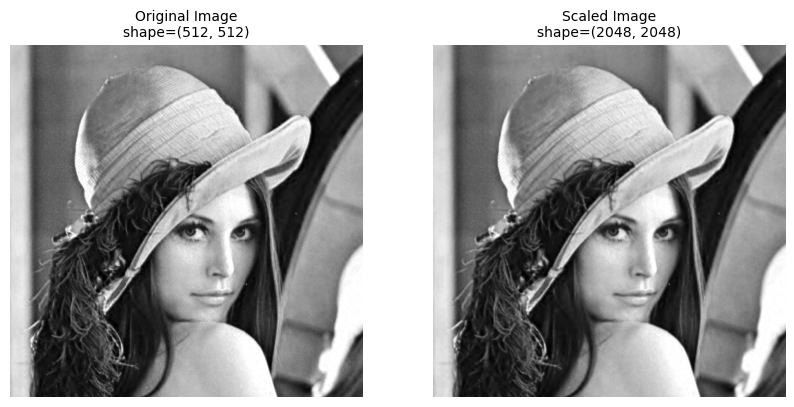

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"): 
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes   
    if img.ndim == 3: 
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap=plt.cm.gray)
        
img1 = cv2.imread( "Lenna.bmp", -1 )
nr, nc = img1.shape[:2]
scale = 4
nr2 = int( nr * scale )
nc2 = int( nc * scale )
img2 = cv2.resize(img1, ( nr2, nc2 ), interpolation = cv2.INTER_LINEAR)

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Scaled Image\nshape={}".format(img2.shape),     
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## 2.13 Image Rescaling

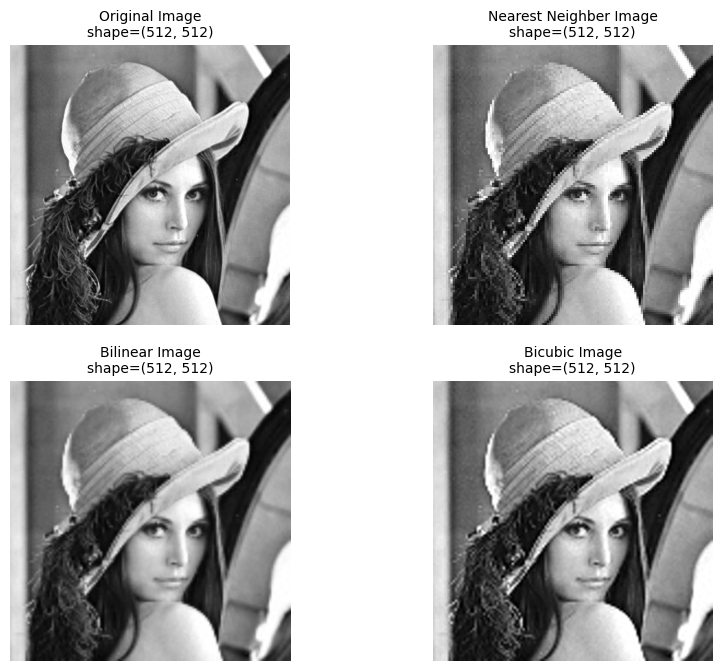

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

img1 = cv2.imread( "Lenna.bmp", -1 )
nr1, nc1 = img1.shape[:2]
nr2, nc2 = nr1 // 4, nc1 // 4
img2 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_NEAREST )
img2 = cv2.resize( img2, ( nr1, nc1 ), interpolation = cv2.INTER_NEAREST )
img3 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_LINEAR )
img3 = cv2.resize( img3, ( nr1, nc1 ), interpolation = cv2.INTER_LINEAR )
img4 = cv2.resize( img1, ( nr2, nc2 ), interpolation = cv2.INTER_CUBIC )
img4 = cv2.resize( img4, ( nr1, nc1 ), interpolation = cv2.INTER_CUBIC ) 


display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Nearest Neighber Image\nshape={}".format(img2.shape),    
"Bilinear Image\nshape={}".format(img3.shape),
"Bicubic Image\nshape={}".format(img4.shape),       
]
display_img = [img1, img2, img3, img4]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red"> 2.14 Homework PSNR</font> <p>
<font color="Red"> Design a PSNR function to measure the difference between 
(img,img1), (img,img2), and (img,img3)<p>
<img src="https://4.bp.blogspot.com/-82C6B1wcYz0/UvIjcJ4S6TI/AAAAAAAABCY/OwGVIQwgUAc/s1600/fig1.PNG"></p>

In [14]:
import numpy as np
import math

def psnr_2(img1, img2):
#-------------- Code Here -matrix-----------------#  
    mse=np.meam((img1-img2)**2)
    if mwe ==0:
        mse   1
    return 10*math.log10(255**2/mse)

#-------------- Code Here ------------------#  

def psnr(img1, img2):
#-------------- Code Here ------------------#      


#-------------- Stop Here ------------------#  

psnr1 = psnr(img1,img2)
psnr11 = psnr_2(img1,img2)
psnr2 = psnr(img1,img3)
psnr3 = psnr(img1,img4)
print("PSNR between origin and Nearest Neighbor",psnr1)
print("PSNR between origin and Nearest Neighbor PSNR2",psnr11)
print("PSNR between origin and Bilinear",psnr2)
print("PSNR between origin and Bicubic",psnr3)

C:\Users\Chen\AppData\Local\Temp\ipykernel_28604\1561940961.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
  SE = SE + (img1[x,y]-img2[x,y]) * (img1[x,y]-img2[x,y])


PSNR2:MSE=49.690975189208984
PSNR between origin and Nearest Neighbor 31.16802840976142
PSNR between origin and Nearest Neighbor PSNR2 31.16802840976142
PSNR between origin and Bilinear 32.87186372832708
PSNR between origin and Bicubic 33.01212649632711


## 2.15 Image Rotation

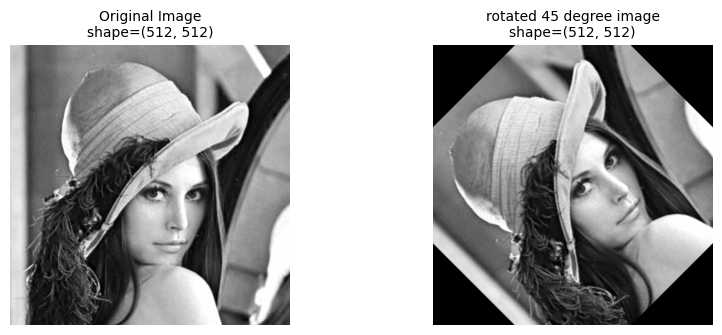

In [27]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
nr2, nc2 = img1.shape[:2]
degree = 45
rotation_matrix = cv2.getRotationMatrix2D( ( nr2 / 2, nc2 / 2 ), degree, 1 )
img2 = cv2.warpAffine( img1, rotation_matrix, ( nr2, nc2 ) ) 

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"rotated "+str(degree)+ " degree image\nshape={}".format(img2.shape),          
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## 2.16 Image Flip

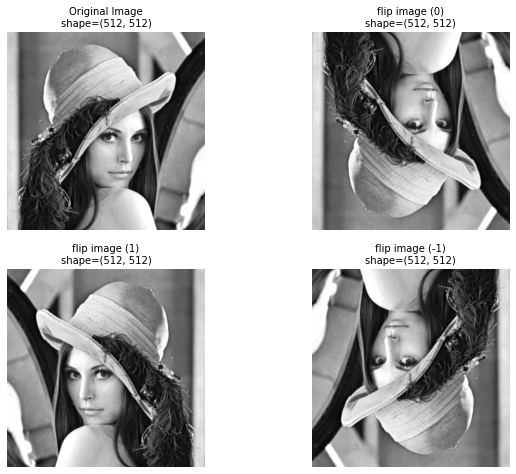

In [16]:
import numpy as np
import cv2

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.flip( img1, 0 )
img3 = cv2.flip( img1, 1 )
img4 = cv2.flip( img1, -1 )

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"flip image (0)\nshape={}".format(img2.shape),  
"flip image (1)\nshape={}".format(img2.shape), 
"flip image (-1)\nshape={}".format(img2.shape),     
]
display_img = [img1, img2, img3, img4]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

##  <font color="Red"> 2.17 Homework Flip </font>
<font color="Red"> Write Flip function yourself, don't use cv2.flip   
img2 = my_flip( img1,0) #same as cv2.flip(img1,0)   
img3 = my_flip( img1,1) #same as cv2.flip(img1,1)   
img4 = my_flip( img1,-1) #same as cv2.flip(img1,-1)   
</font>

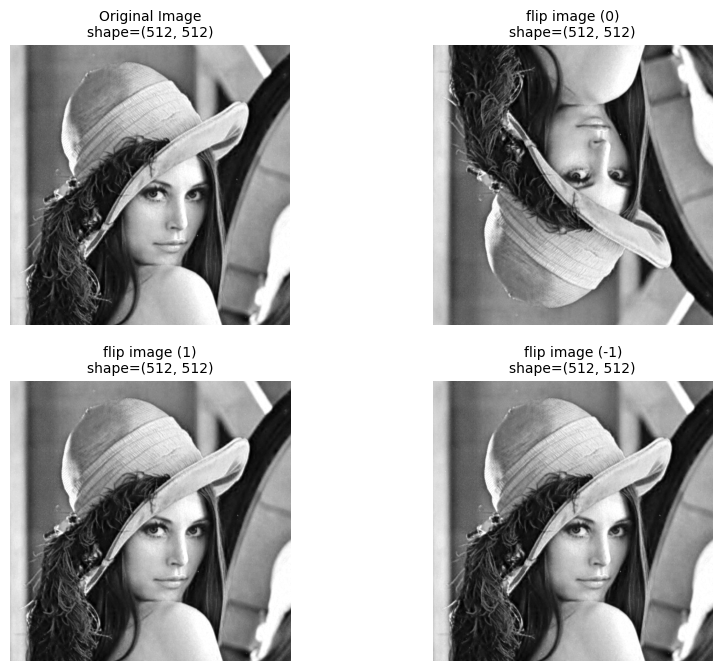

In [35]:
import numpy as np
import math

def my_flip(img1, type):
# type = 0, vertical flip
# type = 1, horizontal flip
# type = -1, vertical and horizontal flip   
#-------------- Code Here ------------------# 
    nr,nc = img1.shape[:2]
    u = img1.copy()
    for i in range(nr):
        for j in range(nc):
            if type == 0 :
                u[nr-1-i,j] = img1[i,j] 

#-------------- Stop Here ------------------#                 
    return u

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = my_flip(img1,0)
img3 = my_flip(img1,1)
img4 = my_flip(img1,-1)

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"flip image (0)\nshape={}".format(img2.shape),  
"flip image (1)\nshape={}".format(img2.shape), 
"flip image (-1)\nshape={}".format(img2.shape),     
]
display_img = [img1, img2, img3, img4]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

##  <font color="Black"> 2.18 Affine Transformation </font>

[[0.59960938 0.3984375  0.        ]
 [0.         1.         0.        ]]
[[-1.000000e+00  0.000000e+00  5.120000e+02]
 [ 1.953125e-01  8.046875e-01  0.000000e+00]]
[[ -1.   0. 512.]
 [  0.   1.   0.]]
[[  0.6015625  -0.3984375 204.       ]
 [  0.          1.          0.       ]]
[[-1.000000e+00  0.000000e+00  5.120000e+02]
 [-1.953125e-01  8.046875e-01  1.000000e+02]]


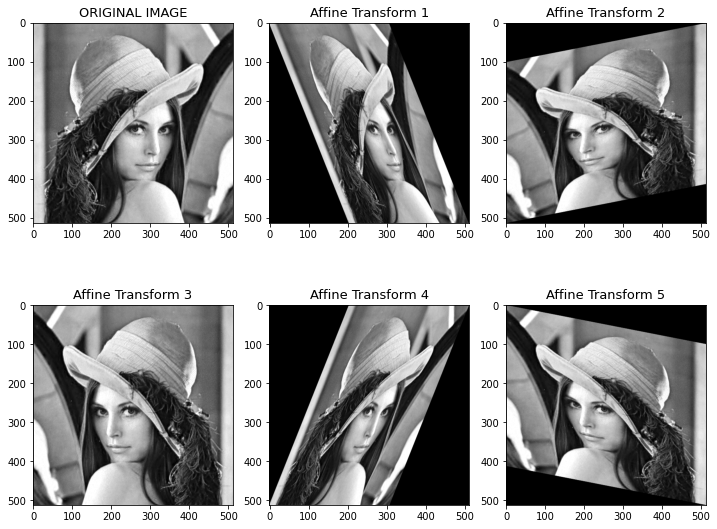

In [18]:
import numpy as np
import math
import cv2

def affine_transform(image, src_points, dest_points):
    affine_matrix = cv2.getAffineTransform(src_points, dest_points)
    print(affine_matrix)
    return_img = cv2.warpAffine(image, affine_matrix, (image.shape[0], image.shape[1]))
    return return_img

affine_names = ["ORIGINAL IMAGE", "Affine Transform"] # will be set as title for each image
img1 = cv2.imread( "Lenna.bmp", -1 )
rows, cols = img1.shape[:2] # will return rows = cols = 330
src_points = np.float32([[0, 0], [cols, 0], [0, rows]])
    
            # float32([[x1, y1], [x2, y2], [x3, y3]])
dst_points1 = np.float32([[0, 0], [int(.6*cols), 0], [int(.4*cols), rows]])
dst_points2 = np.float32([[cols, 0], [0, 100], [cols, rows-100]])
dst_points3 = np.float32([[cols, 0], [0, 0], [cols, rows]])
dst_points4 = np.float32([[int(.4*cols), 0], [cols, 0], [0, rows]])
dst_points5 = np.float32([[cols, 100], [0, 0], [cols, rows]])

affine_fig = plt.figure(figsize=(10, 8)) # figsize(width/horizontally, height/vertically)
affine_img = [
    img1, # the original image
    affine_transform(img1, src_points, dst_points1),
    affine_transform(img1, src_points, dst_points2),
    affine_transform(img1, src_points, dst_points3),
    affine_transform(img1, src_points, dst_points4),
    affine_transform(img1, src_points, dst_points5)
]

for i in range(len(affine_img)):
    a = affine_fig.add_subplot(2, 3, i+1) # position index always starts from 1, thus i+1
    plot_image(affine_img[i], title=affine_names[0] if i == 0 else affine_names[1] + " " + str(i), font_size=13, axis="on")
plt.tight_layout() # margin adjusted


##  <font color="Red"> 2.19 Homework Affine Transformation </font>
<font color="Red"> The followings are code from ChatGPT.   
    Please modify these codes for image affine transform to fit the following requirement    
    1. only use OpenCV on image read and image display    
    2. don't use PIL on image processing    

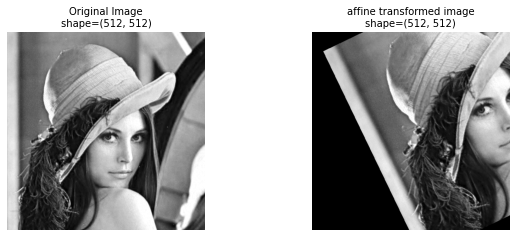

In [19]:
'''
import numpy as np
from PIL import Image
def affine_transform(image, matrix):
    # 获取图像的宽度和高度
    width, height = image.size
    # 创建输出图像
    transformed_image = Image.new("RGB", (width, height))
    pixels = transformed_image.load()
    # 反向映射
    inv_matrix = np.linalg.inv(matrix)
    for x in range(width):
        for y in range(height):
            # 计算原始图像中的位置
            original_pos = np.dot(inv_matrix, [x, y, 1])
            original_x, original_y = original_pos[0], original_pos[1]
            # 检查是否在原始图像的范围内
            if 0 <= original_x < width and 0 <= original_y < height:
                # 获取原始图像中的像素值
                original_pixel = image.getpixel((int(original_x), int(original_y)))
                # 设置变换后图像中的像素值
                pixels[x, y] = original_pixel
    return transformed_image
# 读取图像
image = Image.open('input.jpg')
# 定义仿射变换矩阵
# 例如：缩放、旋转、平移
scale_x, scale_y = 1.2, 1.2
rotate_angle = np.radians(30)
translate_x, translate_y = 50, 30
# 构建仿射变换矩阵
matrix = np.array([
    [scale_x * np.cos(rotate_angle), -np.sin(rotate_angle), translate_x],
    [np.sin(rotate_angle), scale_y * np.cos(rotate_angle), translate_y],
    [0, 0, 1]
])
# 应用仿射变换
transformed_image = affine_transform(image, matrix)
# 显示原始图像和变换后的图像
image.show()
transformed_image.show()
'''

#-------------- Code Here ------------------# 

    
#-------------- Stop Here ------------------# 

## 2.20 Perspective Transform

1335 2000


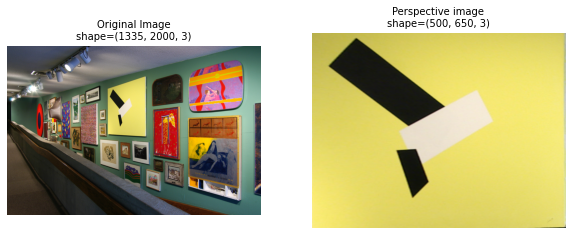

In [20]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
print(nr,nc)
pts1 = np.float32( [ [ 795, 350 ], [ 795, 690 ], [ 1090, 720 ], [ 1090, 250 ] ] )
pts2 = np.float32( [ [ 0, 0 ], [ 0, 500 ], [ 650, 500 ], [ 650, 0 ] ] )
T = cv2.getPerspectiveTransform( pts1, pts2 )
img2 = cv2.warpPerspective( img1, T, ( 650, 500 ) )

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Perspective image\nshape={}".format(img2.shape),          
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red">2.21 Practice: Perspective transform </font>
#### <font color="Red"> use perspective transform to find the following result
<img src="IP02_2.png" height="600px">


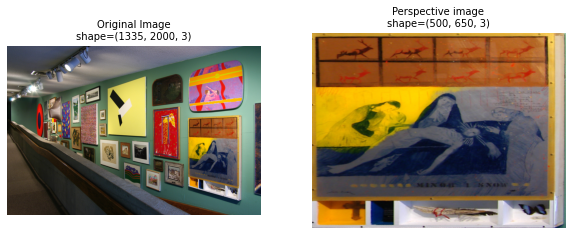

In [21]:
import numpy as np
import cv2

imgBGR = cv2.imread("Gallery.bmp", cv2.IMREAD_COLOR)
img1 = imgBGR[:,:,::-1]
nr, nc = img1.shape[:2]
#-------------- Code Here ------------------# 


#-------------- Stop Here ------------------# 
display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Perspective image\nshape={}".format(img2.shape),          
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red">2.22 Practice:Rotation and Scaling </font>
#### <font color="Red"> Please use the combination of cv2.getRotationMatrix2D and cv2.warpAffine to rotate an image with given degree and fit in the image under size 512x512
<img src="IP02_3.png" height="600px">
<img src="IP02_4.png" height="600px">

0.7320508075688773
0.8632179900134445
0.7098078142164794


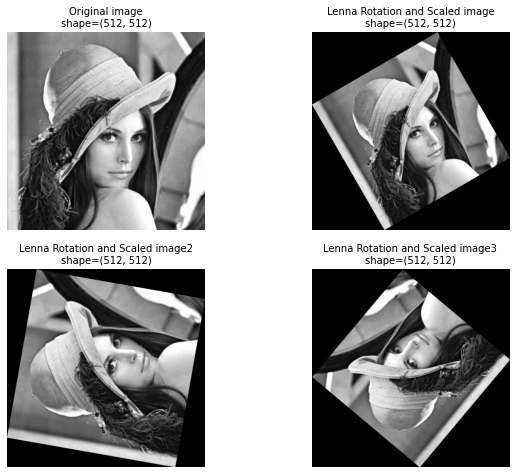

In [23]:
#-------------- Code Here ------------------# 


#-------------- Stop Here ------------------# 